In [1]:
import numpy as np
import pathlib
import math
import tqdm
import scipy.io
from matplotlib import pyplot as plt
import scipy.io
import h5py
import re
from lxml import etree as ET
import scipy.signal as sig
import pandas as pd
from scipy.stats import kde
from BlockSync_current import BlockSync
import UtilityFunctions_newOE as uf

In [7]:

block_numbers = [23,24,25,26,27,28,29,30,31,32,65,66,67,68]
bad_blocks = [42, 61, 62, 64, 65, 66]
experiment_path = pathlib.Path(r"Z:\Nimrod\experiments")
animal = 'PV_62'
block_collection = uf.block_generator(block_numbers=block_numbers,
                                      experiment_path=experiment_path,
                                      animal=animal,
                                      bad_blocks=bad_blocks)

instantiated block number 023 at Path: Z:\Nimrod\experiments\PV_62\2023_04_27\block_023, new OE version
Found the sample rate for block 023 in the xml file, it is 20000 Hz
created the .oe_rec attribute as an open ephys recording obj with get_data functionality
retrieving zertoh sample number for block 023
got it!
instantiated block number 024 at Path: Z:\Nimrod\experiments\PV_62\2023_04_27\block_024, new OE version
Found the sample rate for block 024 in the xml file, it is 20000 Hz
created the .oe_rec attribute as an open ephys recording obj with get_data functionality
retrieving zertoh sample number for block 024
got it!
instantiated block number 025 at Path: Z:\Nimrod\experiments\PV_62\2023_04_27\block_025, new OE version
Found the sample rate for block 025 in the xml file, it is 20000 Hz
created the .oe_rec attribute as an open ephys recording obj with get_data functionality
retrieving zertoh sample number for block 025
got it!
instantiated block number 026 at Path: Z:\Nimrod\experi

In [8]:
for block in block_collection:
    block.parse_open_ephys_events()
    block.get_eye_brightness_vectors()
    block.synchronize_block()
    block.create_eye_brightness_df(threshold_value=20)

running parse_open_ephys_events...
block 023 has a parsed events file, reading...
getting eye brigtness values for block 023...
found a file!
blocksync_df loaded from analysis folder
eye_brightness_df loaded from analysis folder
running parse_open_ephys_events...
block 024 has a parsed events file, reading...
getting eye brigtness values for block 024...
found a file!
blocksync_df loaded from analysis folder
eye_brightness_df loaded from analysis folder
running parse_open_ephys_events...
block 025 has a parsed events file, reading...
getting eye brigtness values for block 025...
found a file!
blocksync_df loaded from analysis folder
eye_brightness_df loaded from analysis folder
running parse_open_ephys_events...
block 026 has a parsed events file, reading...
getting eye brigtness values for block 026...
found a file!
blocksync_df loaded from analysis folder
eye_brightness_df loaded from analysis folder
running parse_open_ephys_events...
block 027 has a parsed events file, reading...
ge

In [9]:
block_collection[10]

BlockSync object for animal PV_62 with 
block_num 067 at date 2023-05-18_11-26-48

In [10]:
for block in block_collection:
    block.import_manual_sync_df()
    block.read_dlc_data()

eye dataframes loaded from analysis folder
eye dataframes loaded from analysis folder
eye dataframes loaded from analysis folder
eye dataframes loaded from analysis folder
eye dataframes loaded from analysis folder
eye dataframes loaded from analysis folder
eye dataframes loaded from analysis folder
eye dataframes loaded from analysis folder
eye dataframes loaded from analysis folder
eye dataframes loaded from analysis folder
eye dataframes loaded from analysis folder
eye dataframes loaded from analysis folder


In [11]:
for block in block_collection:
    print(block)
    block.saccade_dict_creation(2000,5,automate_saccade_detection=True, overwrite_saccade_data=False)


PV_62, block 023, on 2023-04-27_10-52-42
path to mat file is Z:\Nimrod\experiments\PV_62\2023_04_27\block_023\oe_files\2023-04-27_10-52-42\Record Node 108\analysis\recNames=Block0023,Animal=PV_62\lizMov.mat
loaded chunked saccade data from analysis folder
getting data with block_number 023: 
There are 556 saccade events: 
pre_saccade_ts = [  38430.     39126.35   39364.1    40587.     46717.75   48246.2
   50046.4    50199.3    50555.9    51116.35   51218.3    51371.1
   51710.7    53545.     53697.85   53833.75   54428.15   54581.
   55073.55   56041.65   59591.1    62800.5    65500.9    72633.85
   81686.8    86561.65   86833.4    88039.25   88158.15   88260.05
   88446.9    88514.8    88599.7    88752.6    88939.4    89007.35
   89414.9    91130.15   91571.7    92081.15   92488.75   92590.65
   93338.05   94000.35   95222.95   96394.7    98483.5    98840.2
   99111.9    99791.25  101183.75  103153.8   110796.55  115909.
  116724.35  119646.15  119833.    120240.65  121531.2   121633

In [12]:
block_sync_dfs = [block.synced_saccades_df for block in block_collection]
stacked_synced_df = pd.concat(block_sync_dfs, ignore_index=True)
block_non_synced_dfs = [block.non_synced_saccades_df for block in block_collection]
stacked_non_synced_df = pd.concat(block_non_synced_dfs, ignore_index=True)


In [15]:
stacked_synced_df

,datetime,block,eye,timestamps,fs,pxx,samples,x_coords,y_coords,vid_inds,x_speed,y_speed,magnitude,dx,dy,direction,accel,calib_dx,calib_dy
0,2023-04-27_10-52-42,023,L,38430,"[0.0, 1.220703125, 2.44140625, 3.662109375, 4....","[21.230001477120823, 132.57830316922525, 154.1...","[15.21, 6.63, -1.56, 11.31, -14.04000000000000...","[181.35553973499248, 181.29654323662052, 182.5...","[192.2391691082757, 191.9051393362668, 193.229...","[0, 340, 680, 1020, 1359, 1699, 2039, 2378, 27...","[0.0, -0.058996498371953976, 1.205469058943549...","[0.0, -0.3340297720088756, 1.3244892246667064,...",36.7954,-15.6217,33.3146,154.878,0,-0.868178,1.85147
1,2023-04-27_10-52-42,023,L,39126.3,"[0.0, 1.220703125, 2.44140625, 3.662109375, 4....","[172.56771367747237, 513.301973360828, 312.630...","[-43.485, -19.305, -7.0200000000000005, -32.76...","[181.35553973499248, 181.29654323662052, 182.5...","[192.2391691082757, 191.9051393362668, 193.229...","[0, 340, 680, 1020, 1359, 1699, 2039, 2378, 27...","[0.0, -0.058996498371953976, 1.205469058943549...","[0.0, -0.3340297720088756, 1.3244892246667064,...",36.7954,-15.6217,33.3146,154.878,0,-0.868178,1.85147
2,2023-04-27_10-52-42,023,L,39364.1,"[0.0, 1.220703125, 2.44140625, 3.662109375, 4....","[50.252659001191205, 550.345529481624, 402.680...","[-28.470000000000002, -23.400000000000002, -21...","[181.35553973499248, 181.29654323662052, 182.5...","[192.2391691082757, 191.9051393362668, 193.229...","[0, 340, 680, 1020, 1359, 1699, 2039, 2378, 27...","[0.0, -0.058996498371953976, 1.205469058943549...","[0.0, -0.3340297720088756, 1.3244892246667064,...",36.7954,-15.6217,33.3146,154.878,0,-0.868178,1.85147
3,2023-04-27_10-52-42,023,L,40587,"[0.0, 1.220703125, 2.44140625, 3.662109375, 4....","[13.944797937505369, 74.85746732506726, 70.534...","[25.35, 5.655, -21.45, -14.43, 16.575, 4.485, ...","[178.7543898025429, 178.7429735536779, 178.862...","[211.20660922295718, 211.39517637215664, 211.4...","[0, 339, 679, 1019, 1358, 1698, 2038, 2377, 27...","[0.0, -0.011416248865003809, 0.119355640392427...","[0.0, 0.18856714919945716, 0.05916339783428270...",33.1122,31.3672,10.6074,18.684,0,1.74324,0.589512
4,2023-04-27_10-52-42,023,L,46717.8,"[0.0, 1.220703125, 2.44140625, 3.662109375, 4....","[3.109451401947336, 246.72568950784057, 482.27...","[-43.875, -56.160000000000004, -76.44, -86.385...","[202.97833793342232, 203.00929383557946, 202.9...","[201.63188326069908, 201.4539524063485, 201.42...","[0, 340, 680, 1020, 1359, 1699, 2038, 2379, 27...","[0.0, 0.03095590215713173, -0.0104771808314296...","[0.0, -0.17793085435059197, -0.024522625198102...",16.0853,11.6223,-11.1203,313.735,0,0.645913,-0.618011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10535,2023-05-18_12-06-08,068,R,3.62277e+06,"[0.0, 1.220703125, 2.44140625, 3.662109375, 4....","[40.80672775425115, 220.22168667079495, 336.87...","[-27.69, -31.785, -56.160000000000004, -42.315...","[534.3980573032895, 534.4213860460732, 534.326...","[315.3367174584785, 315.8784980468177, 315.585...","[0, 339, 679, 1019, 1359, 1698, 2038, 2378, 27...","[0.0, 0.02332874278363306, -0.0952032273598888...","[0.0, 0.5417805883391793, -0.2933220765285114,...",37.0102,36.3766,6.81882,10.6169,5.3602e+06,1.83718,0.34438
10536,2023-05-18_12-06-08,068,R,3.64533e+06,"[0.0, 1.220703125, 2.44140625, 3.662109375, 4....","[4.7482491432749105, 105.91370592091948, 201.3...","[31.200000000000003, 16.77, 12.48, 21.84, 20.8...","[543.0452465030722, 542.9823420870424, 542.978...","[340.90072430194687, 340.8215693684861, 340.63...","[0, 340, 679, 1019, 1359, 1699, 2038, 2378, 27...","[0.0, -0.06290441602982355, -0.004097950599316...","[0.0, -0.07915493346075664, -0.184175677541929...",29.7593,-22.5969,19.3648,130.595,9.96431e+06,-1.14124,0.978005
10537,2023-05-18_12-06-08,068,R,3.64604e+06,"[0.0, 1.220703125, 2.44140625, 3.662109375, 4....","[16.714160553035786, 137.405826748477, 167.383...","[-14.625, -16.77, -22.035, -35.49, -38.61, -44...","[543.9172532490953,

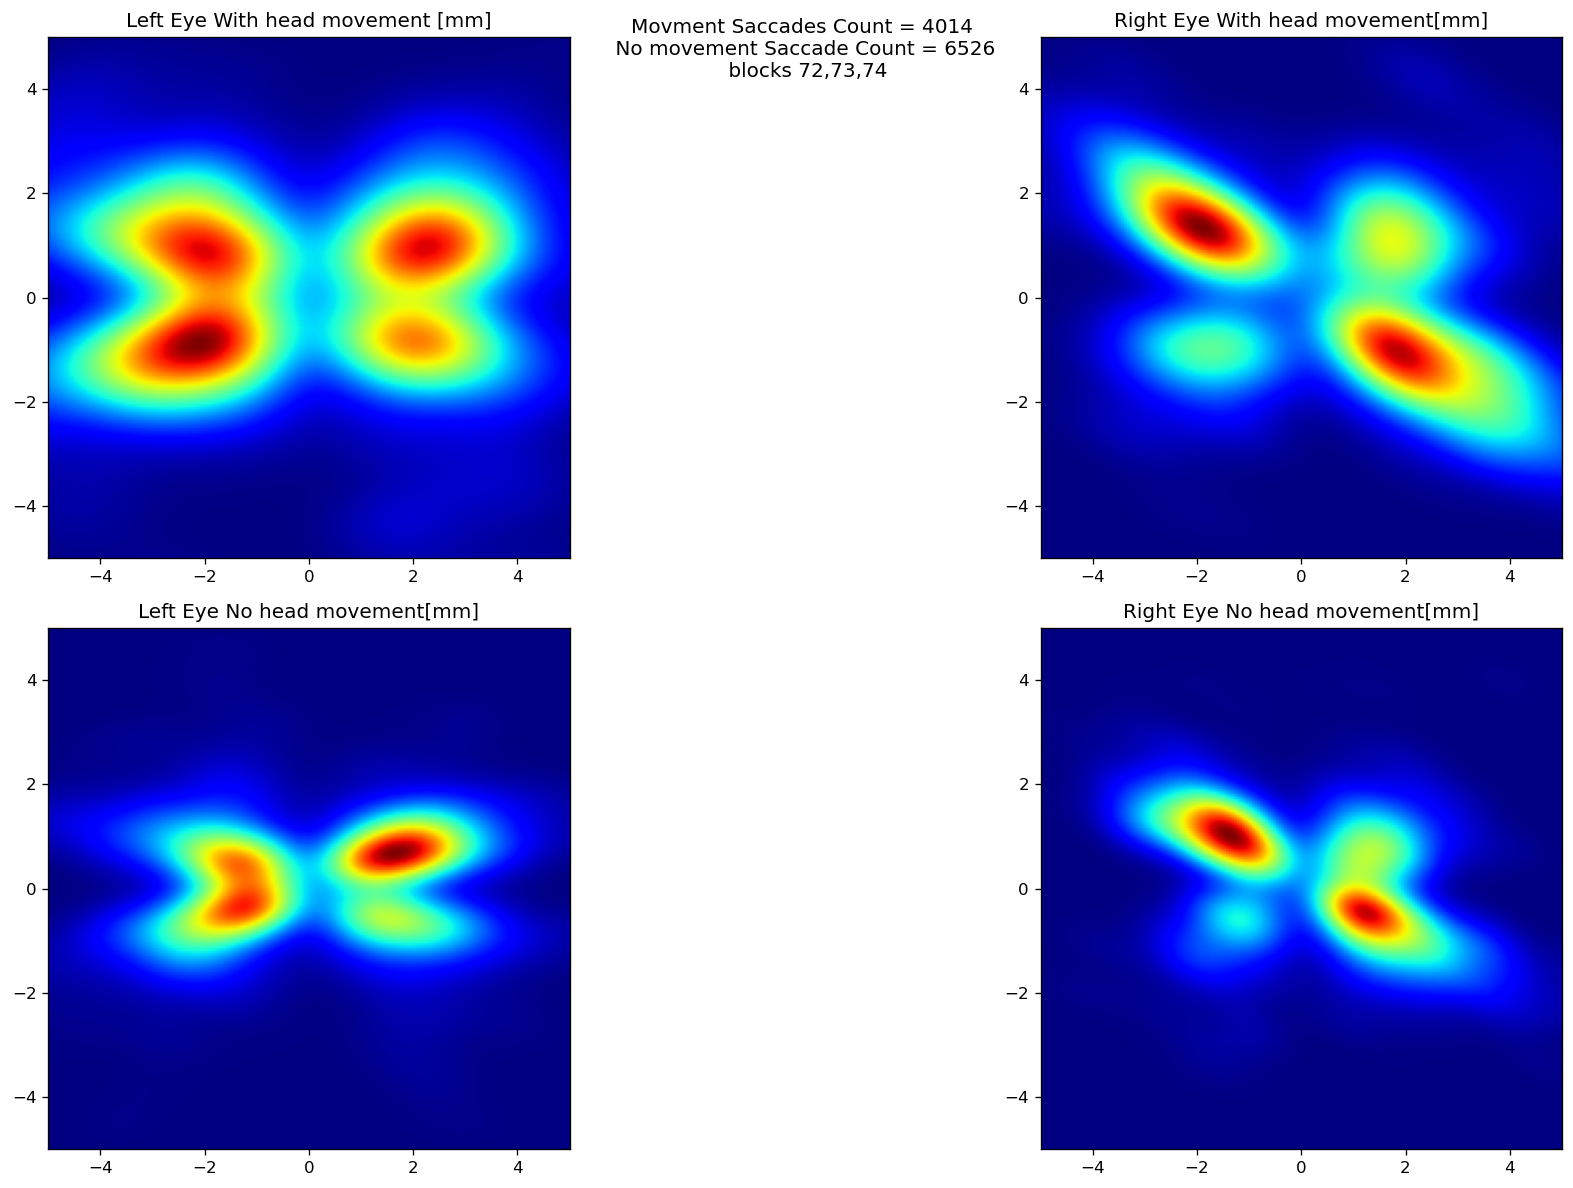

In [17]:
# this cell creates the synced saccades heatmap:

# I can now query the data I want to analyze, let's take all the 0 accel magnitude saccades:
no_accel_df = stacked_synced_df.query("accel == 0")
all_accel_df = stacked_synced_df.query("accel != 0")

# I can produce the KDE graphs for them:
# parse queries:
la_x = all_accel_df.query('eye == "L"')['calib_dx']
la_y = all_accel_df.query('eye == "L"')['calib_dy']
ra_y = all_accel_df.query('eye == "R"')['calib_dy']
ra_x = all_accel_df.query('eye == "R"')['calib_dx']

ln_x = no_accel_df.query('eye == "L"')['calib_dx']
ln_y = no_accel_df.query('eye == "L"')['calib_dy']
rn_y = no_accel_df.query('eye == "R"')['calib_dy']
rn_x = no_accel_df.query('eye == "R"')['calib_dx']

#understand graph bounderies:
x_stack = np.concatenate([la_x,ra_x,ln_x,rn_x])
y_stack = np.concatenate([la_y,ra_y,ln_y,rn_y])
global_max = np.max(np.concatenate([x_stack,y_stack]))
global_min = np.min(np.concatenate([x_stack,y_stack]))

#xlim = (np.min(x_stack), np.max(x_stack))
#ylim = (np.min(y_stack), np.max(y_stack))
global_max = 5
global_min = -5
# create the graph
fig, axes = plt.subplots(ncols=2, nrows=2, figsize =(10*2,5*2), dpi=120)
uf.plot_kde(axes[0,0],la_x,la_y,200,'Left Eye With head movement [mm]',global_max=global_max,global_min=global_min)
uf.plot_kde(axes[0,1],ra_x,ra_y,200,'Right Eye With head movement[mm]',global_max=global_max,global_min=global_min)
uf.plot_kde(axes[1,0],ln_x,ln_y,200,'Left Eye No head movement[mm]',global_max=global_max,global_min=global_min)
uf.plot_kde(axes[1,1],rn_x,rn_y,200,'Right Eye No head movement[mm]',global_max=global_max,global_min=global_min)
fig.suptitle(f"Movment Saccades Count = {len(all_accel_df)} \n No movement Saccade Count = {len(no_accel_df)} \n blocks 72,73,74")
fig.tight_layout()
#plt.savefig(rf'D:\MarkS3\Pictures\Graphs\PV_62\synced_saccades_heatmaps_b23_b32.pdf', format='pdf')

In [12]:
no_accel_df

,datetime,block,eye,timestamps,fs,pxx,samples,x_coords,y_coords,vid_inds,x_speed,y_speed,magnitude,dx,dy,direction,accel,calib_dx,calib_dy


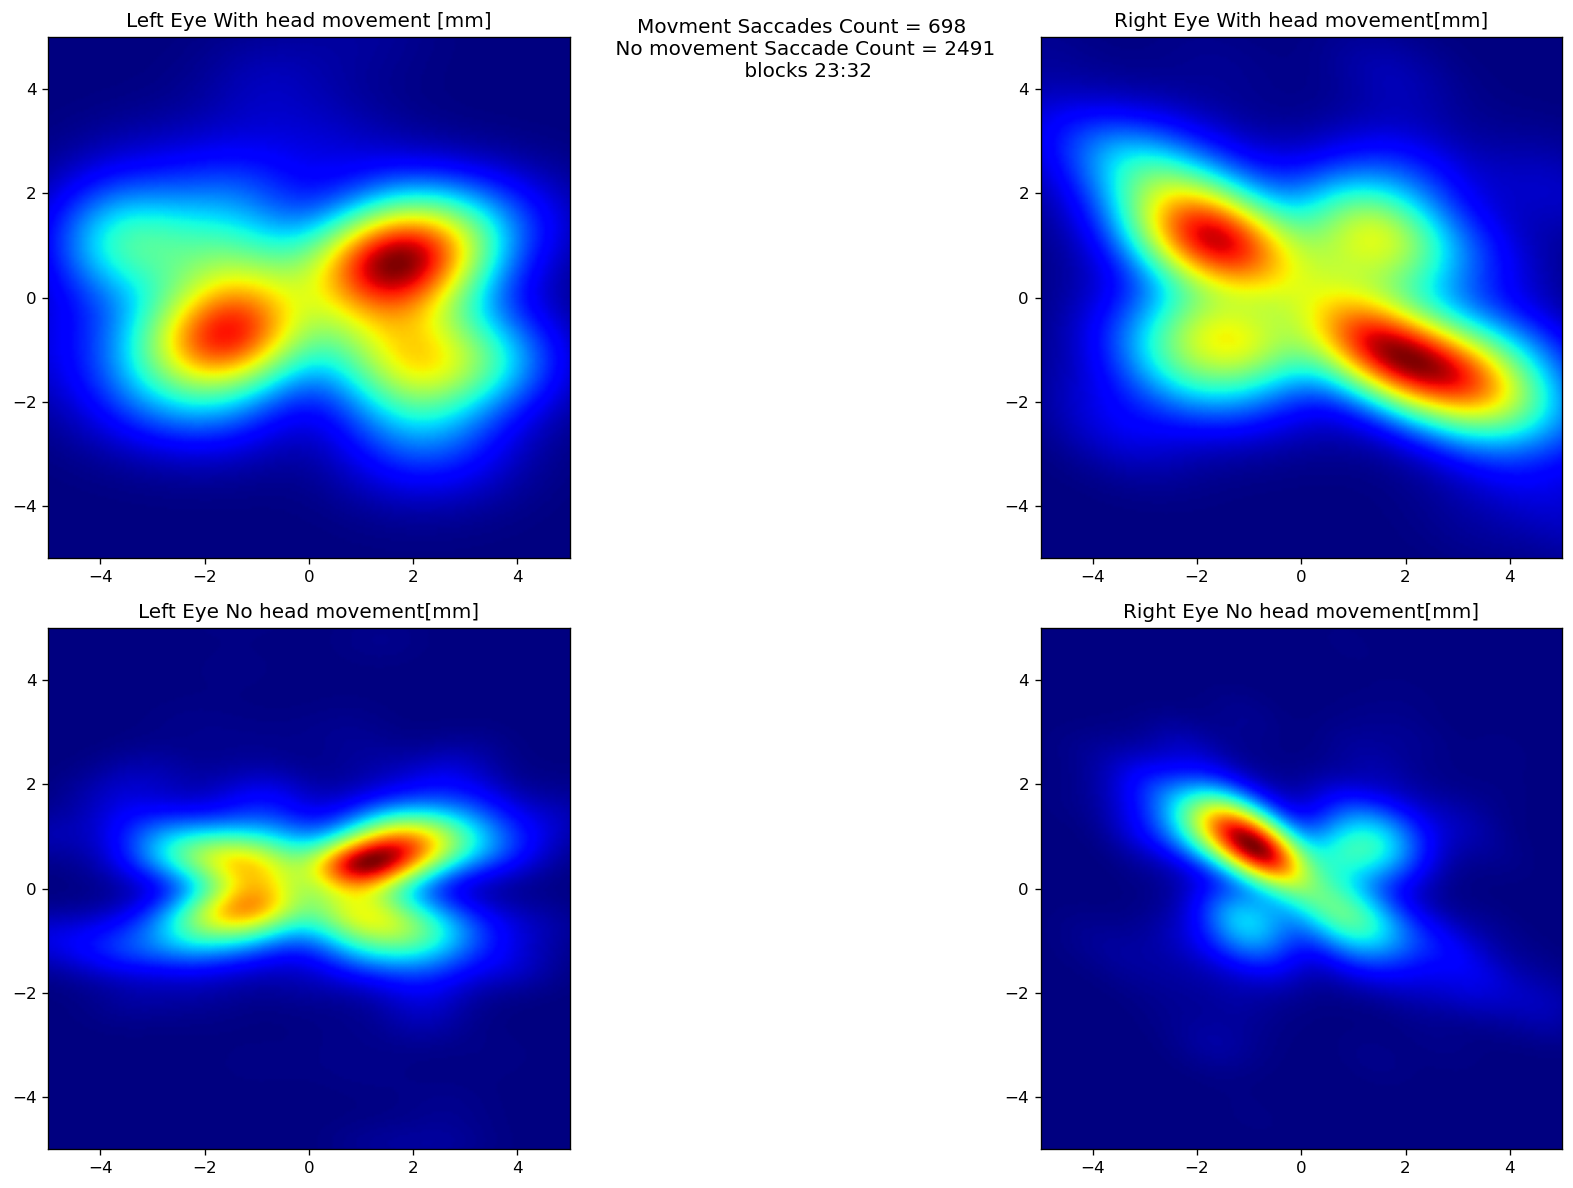

In [19]:
# this cell creates the synced saccades heatmap:

# I can now query the data I want to analyze, let's take all the 0 accel magnitude saccades:
no_accel_df = stacked_non_synced_df.query("accel == 0")
all_accel_df = stacked_non_synced_df.query("accel != 0")

# I can produce the KDE graphs for them:
# parse queries:
la_x = all_accel_df.query('eye == "L"')['calib_dx']
la_y = all_accel_df.query('eye == "L"')['calib_dy']
ra_y = all_accel_df.query('eye == "R"')['calib_dy']
ra_x = all_accel_df.query('eye == "R"')['calib_dx']

ln_x = no_accel_df.query('eye == "L"')['calib_dx']
ln_y = no_accel_df.query('eye == "L"')['calib_dy']
rn_y = no_accel_df.query('eye == "R"')['calib_dy']
rn_x = no_accel_df.query('eye == "R"')['calib_dx']

#understand graph bounderies:
x_stack = np.concatenate([la_x,ra_x,ln_x,rn_x])
y_stack = np.concatenate([la_y,ra_y,ln_y,rn_y])
global_max = np.max(np.concatenate([x_stack,y_stack]))
global_min = np.min(np.concatenate([x_stack,y_stack]))

#xlim = (np.min(x_stack), np.max(x_stack))
#ylim = (np.min(y_stack), np.max(y_stack))
global_max = 5
global_min = -5
# create the graph
fig, axes = plt.subplots(ncols=2, nrows=2, figsize =(10*2,5*2), dpi=120)
uf.plot_kde(axes[0,0],la_x,la_y,200,'Left Eye With head movement [mm]',global_max=global_max,global_min=global_min)
uf.plot_kde(axes[0,1],ra_x,ra_y,200,'Right Eye With head movement[mm]',global_max=global_max,global_min=global_min)
uf.plot_kde(axes[1,0],ln_x,ln_y,200,'Left Eye No head movement[mm]',global_max=global_max,global_min=global_min)
uf.plot_kde(axes[1,1],rn_x,rn_y,200,'Right Eye No head movement[mm]',global_max=global_max,global_min=global_min)
fig.suptitle(f"Movment Saccades Count = {len(all_accel_df)} \n No movement Saccade Count = {len(no_accel_df)} \n blocks 23:32")
fig.tight_layout()
#plt.savefig(rf'D:\MarkS3\Pictures\Graphs\PV_62\non_synced_saccades_heatmaps_b23_b32.pdf', format='pdf')

In [77]:
block = block_collection[8]
block.parse_open_ephys_events()
block.get_eye_brightness_vectors(threshold_value=10)
block.synchronize_block()
block.create_eye_brightness_df(threshold_value=10)

running parse_open_ephys_events...
block 038 has a parsed events file, reading...
getting eye brigtness values for block 038...

working on video Z:\Nimrod\experiments\PV_62\2023_05_01\block_038\eye_videos\LE\230501_pv62_trial1_640x480_60hz_experiment_1_recording_0\230501_pv62_trial1_LE.mp4
done, frame_val_list contains 1 objects
working on video Z:\Nimrod\experiments\PV_62\2023_05_01\block_038\eye_videos\RE\230501_pv62_trial1_640x480_60hz_experiment_1_recording_0\230501_pv62_trial1.mp4
done, frame_val_list contains 1 objects
creating blocksync_df


100%|██████████| 156180/156180 [04:08<00:00, 629.69it/s]


created blocksync_df
exported blocksync_df to Z:\Nimrod\experiments\PV_62\2023_05_01\block_038\analysis/ blocksync_df.csv
eye_brightness_df already exists


[BlockSync object for animal PV_62 with 
 block_num 030 at date 2023-04-27_14-45-50,
 BlockSync object for animal PV_62 with 
 block_num 031 at date 2023-04-27_15-17-38,
 BlockSync object for animal PV_62 with 
 block_num 032 at date 2023-04-27_15-51-55,
 BlockSync object for animal PV_62 with 
 block_num 033 at date 2023-04-30_10-34-58,
 BlockSync object for animal PV_62 with 
 block_num 034 at date 2023-04-30_11-16-53,
 BlockSync object for animal PV_62 with 
 block_num 035 at date 2023-04-30_11-44-30,
 BlockSync object for animal PV_62 with 
 block_num 036 at date 2023-04-30_12-37-42,
 BlockSync object for animal PV_62 with 
 block_num 037 at date 2023-04-30_13-24-17,
 BlockSync object for animal PV_62 with 
 block_num 039 at date 2023-05-01_14-44-23,
 BlockSync object for animal PV_62 with 
 block_num 040 at date 2023-05-01_15-49-30]

In [79]:
block.get_eyes_diff_list(threshold=1)
block.fix_eye_synchronization()
block.get_blink_frames_manual(threshold=2.5)

index error on position 0 out of 1
index error on position 30 out of 31


IndexError: index 0 is out of bounds for axis 0 with size 0

In [63]:
# use this to manually shift L\R eye synchronization
eye_to_move = 'R'
block.move_eye_sync_manual(cols_to_move=[f'{eye_to_move}_eye_frame',f'{eye_to_move}_values'],step=+2)

In [80]:
block.full_sync_verification(with_arena=False, ms_axis=False)

In [70]:
block.export_manual_sync_df()

In [83]:
block.import_manual_sync_df()

In [10]:
block.read_dlc_data(threshold_to_use=0.999, export=True)

c:\users\marks3\pycharmprojects\pythonproject3\venv\lib\site-packages\IPython\core\interactiveshell.py:3338: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
  9%|▉         | 9079/97329 [00:05<00:51, 1708.18it/s]


KeyboardInterrupt: 

In [9]:
data, timestamps = block.oe_rec.get_analog_data([5],[0],block.final_sync_df['Arena_TTL'].values[-1] / 20)


In [21]:
# pupil vs sound levels

from scipy import signal
from bokeh.io import output as b_output
from bokeh.plotting import show, figure

def downsample_audio_with_timestamps(original_signal, timestamps, original_sample_rate, target_sample_rate):
    # Calculate the downsampling factor
    downsampling_factor = int(original_sample_rate / target_sample_rate)

    # Downsample the original_signal using scipy.signal.decimate
    downsampled_signal = signal.decimate(original_signal, downsampling_factor, zero_phase=True)

    # Calculate the new length of the downsampled signal and timestamps
    new_length = int(len(original_signal) / downsampling_factor)
    downsampled_timestamps = np.linspace(timestamps[0], timestamps[-1], new_length)

    return downsampled_signal, downsampled_timestamps

def show_pupil_diameter_vs_sound(block, analog_file_number, export=False, add_saccades=True, add_eye_position=False, downsample=True):
    """
    This function creates a plot that can compare sound levels and pupil diameters
    :param block: BlockSync object of the block in question
    :param analog_file_number: the file with sound samples
    :return:
    """
    data, timestamps = block.oe_rec.get_analog_data([analog_file_number],[0],[block.final_sync_df['Arena_TTL'].values[-1] / 20])
    if downsample:
        downsampled_signal, downsampled_timestamps = downsample_audio_with_timestamps(original_signal=data[0,0,:],
                                                                                  timestamps=timestamps[0,:],
                                                                                  original_sample_rate=20000,
                                                                                  target_sample_rate=5000)
    else:
        downsampled_signal = data[0,0,:]
        downsampled_timestamps = timestamps[0,:]

    s_samples = downsampled_signal
    sound_samples_z = (s_samples - s_samples.mean()) / s_samples.std()
    sound_timestamps = downsampled_timestamps
    le_el_z = (block.le_df.ellipse_size - block.le_df.ellipse_size.mean()) / block.le_df.ellipse_size.std()
    re_el_z = (block.re_df.ellipse_size - block.re_df.ellipse_size.mean()) / block.re_df.ellipse_size.std()
    x_axis = block.final_sync_df['Arena_TTL'].values / (block.sample_rate / 1000)
    b_fig = figure(title=f'Pupil diameter Vs Sound levels {block.block_num}',
                       x_axis_label='[Milliseconds]',
                       y_axis_label='[Z score]',
                       plot_width=1500,
                       plot_height=700)
    b_fig.line(x_axis, le_el_z+7, legend_label='Left Eye Diameter', line_width=1.5, line_color='blue')
    b_fig.line(x_axis, re_el_z+7, legend_label='Right Eye Diameter', line_width=1.5, line_color='red')
    b_fig.line(sound_timestamps,sound_samples_z, legend_label='sound_level', line_width=1.5, line_color='purple')
    if add_saccades:
        # because I use a pre-saccadic window, I need to correct these to really show where the saccades are in the data:
        ts_before_saccade = ((len(block.synced_saccades_df.iloc[0]['samples']) / 2) / block.sample_rate) * 1000
        synced_ts = block.synced_saccades_df['timestamps'].values + ts_before_saccade
        non_synced_ts = block.non_sync_saccades_df['timestamps'].values + ts_before_saccade
        b_fig.vbar(x=synced_ts, width=1, bottom=-4, top=10,
                       alpha=0.6, color='purple', legend_label='synced saccades')
        b_fig.vbar(x=non_synced_ts, width=1, bottom=-4, top=10,
                   alpha=0.6, color='brown', legend_label='non synced saccades')

    if add_eye_position:
        le_x_z = (block.le_df.center_x - np.mean(block.le_df.center_x)) / block.le_df.center_x.std()
        le_y_z = (block.le_df.center_y - np.mean(block.le_df.center_y)) / block.le_df.center_y.std()
        re_x_z = (block.re_df.center_x - np.mean(block.re_df.center_x)) / block.re_df.center_x.std()
        re_y_z = (block.re_df.center_y - np.mean(block.re_df.center_y)) / block.re_df.center_y.std()
        b_fig.line(x_axis, le_x_z+14, legend_label='Left Eye X Position', line_width=1, line_color='cyan')
        b_fig.line(x_axis, le_y_z, legend_label='Left Eye Y position', line_width=1, line_color='green')
        b_fig.line(x_axis, re_x_z+14, legend_label='Right Eye X Position', line_width=1, line_color='orange')
        b_fig.line(x_axis, re_y_z, legend_label='Right Eye Y position', line_width=1, line_color='pink')
    show(b_fig)
    if export:
        b_output.output_file(filename=str(block.analysis_path / f'sound_vs_pupil_diameter_block_{block.block_num}.html'),
                             title=f'block {block.block_num} pupil_vs_sound')



In [46]:
block = block_collection[3]
block

BlockSync object for animal PV_62 with 
block_num 075 at date 2023-06-21_15-25-44

In [27]:
from scipy.signal import hilbert

mic_analog_channel = 5
data, timestamps = block.oe_rec.get_analog_data([mic_analog_channel],[0],[block.final_sync_df['Arena_TTL'].values[-1] / 20])
downsampled_signal, downsampled_timestamps = downsample_audio_with_timestamps(original_signal=data[0,0,:],
                                                                          timestamps=timestamps[0,:],
                                                                          original_sample_rate=20000,
                                                                          target_sample_rate=10000)


In [30]:
# try to get a hilbert differential of the signal:
from bokeh.models import HoverTool, NumeralTickFormatter
hilbert_signal = np.abs(hilbert(data[0,0,:]))
hilbert_diff = np.diff(hilbert_signal)
b_fig = figure(title=f'Sound levels {block.block_num} - for transient annotation',
                       x_axis_label='Timestamps',
                       y_axis_label='sound envelope',
                       plot_width=1500,
                       plot_height=700)
x_format = '0'
b_fig.line(timestamps[0,:],hilbert_diff)
b_fig.xaxis.formatter = NumeralTickFormatter(format=x_format)
hover = HoverTool(tooltips=[("Timestamp", f"@x{{{x_format}}}")], mode='vline')
b_fig.add_tools(hover)
show(b_fig)

In [26]:
from bokeh.models import HoverTool, NumeralTickFormatter
b_fig = figure(title=f'Sound levels {block.block_num} - for transient annotation',
                       x_axis_label='Timestamps',
                       y_axis_label='sound envelope',
                       plot_width=1500,
                       plot_height=700)
x_format = '0'
b_fig.line(downsampled_timestamps,downsampled_signal)
b_fig.xaxis.formatter = NumeralTickFormatter(format=x_format)
hover = HoverTool(tooltips=[("Timestamp", f"@x{{{x_format}}}")], mode='vline')
b_fig.add_tools(hover)
show(b_fig)

In [ ]:
def get_volume_transients(block, mic_analog_channel):
    data, timestamps = block.oe_rec.get_analog_data([mic_analog_channel],[0],[block.final_sync_df['Arena_TTL'].values[-1] / 20])
    signal = data[0,0,:]
    timestamps = timestamps[0,:]
    diff_sig = np.diff(signal)


In [47]:
show_pupil_diameter_vs_sound(block, analog_file_number=5, export=True, add_saccades=True, add_eye_position=True, downsample=True)

In [23]:
for block in block_collection:
    print(block)
    show_pupil_diameter_vs_sound(block=block, analog_file_number=5, export=True, add_saccades=False, add_eye_position=True, downsample=True)


PV_62, block 072, on 2023-06-21_14-31-03
The requested data segment between 0 ms and [[831276.7]] ms exceeds the recording length, and will be 0-padded to fit the other windows


PV_62, block 073, on 2023-06-21_14-45-37


PV_62, block 074, on 2023-06-21_15-05-38


PV_62, block 075, on 2023-06-21_15-25-44


In [22]:
block = block_collection[0]
l_saccades = block.ms_axis[np.argwhere(block.l_e_speed > 2)]
l_saccades_chunked = block.l_saccades_chunked

In [9]:
for block in block_collection:
    show_pupil_diameter_vs_sound(block=block, analog_file_number=5, export=True, add_saccades=False, add_eye_position=True)


The requested data segment between 0 ms and [[831276.7]] ms exceeds the recording length, and will be 0-padded to fit the other windows


In [39]:
for block in block_collection:
    block.saccade_dict_creation(2000,17)


path to mat file is Z:\Nimrod\experiments\PV_62\2023_06_21\block_072\oe_files\2023-06-21_14-31-03\Record Node 108\analysis\recNames=Block0072,Animal=PV_62\lizMov.mat
loaded chunked saccade data from analysis folder
getting data with block_number 072: 
There are 49 saccade events: 
pre_saccade_ts = [ 41978.5   43252.6   44764.7   55451.7   61176.55  64353.55  64659.4
  71965.85 104672.8  104859.7  107918.3  108207.2  108733.95 121697.75
 121833.65 167822.1  170964.35 181053.75 193062.6  196596.1  197496.6
 313384.9  315712.55 340260.15 341891.2  374225.5  374310.4  374378.4
 374480.3  374769.05 375737.35 377588.85 377979.65 379814.3  384027.25
 384417.9  384502.9  396106.2  396208.1  404888.9  406111.95 406213.9
 406417.75 406553.7  417426.   434023.95 442771.8  562042.15 755083.85]
sample removed for window #46
The requested data segment between 14721 ms and [[16721.]] ms exceeds the recording length, and will be 0-padded to fit the other windows
getting data with block_number 072: 
Th

In [37]:
synced_ts = block.synced_saccades_df['timestamps'].values
non_synced_ts = block.non_sync_saccades_df['timestamps'].values


array([56338.6, 58513.2, 75601.75, 80289.3, 81528.95, 81698.8, 82259.2,
       83413.95, 83566.8, 85944.6, 86318.3, 86386.2, 88339.35, 91005.9,
       97358.15, 120321.95, 121256.3, 122105.65, 133809.2, 186887.5,
       249599.7, 299775.35, 306432.35, 314600.15, 373081.55, 419112.85,
       424630.95, 424715.85, 429554.7, 430284.9, 431099.95, 438181.25,
       440167.8, 473586.2, 484827.45, 500860.5, 503170.15, 503272.0,
       504256.95, 511508.8, 528966.1, 538356.8, 56083.8, 58496.15,
       75601.75, 80289.3, 81545.95, 81545.95, 82259.2, 83396.95, 83396.95,
       85944.6, 86131.45, 86131.45, 88339.35, 91005.9, 97341.15,
       120321.95, 122122.6, 122122.6, 133809.2, 186938.45, 249752.55,
       299792.35, 306449.3, 314600.15, 373064.55, 419095.9, 424630.95,
       424630.95, 429537.7, 430284.9, 431066.0, 438198.2, 440167.8,
       473603.2, 484810.45, 500860.5, 503153.15, 503153.15, 504240.0,
       511491.85, 528949.1, 538373.8], dtype=object)

In [31]:
show_pupil_diameter_vs_sound(block=block, analog_file_number=5, export=True)

In [52]:
downsampled_signal, downsampled_timestamps = downsample_audio_with_timestamps(original_signal=data[0,0,:],
                                                                              timestamps=timestamps[0,:],
                                                                              original_sample_rate=20000,
                                                                              target_sample_rate=1000)


In [55]:
from bokeh.models import HoverTool
from bokeh.plotting import figure, show
s_samples = downsampled_signal
sound_samples_z = (s_samples - s_samples.mean()) / s_samples.std()
sound_timestamps = downsampled_timestamps
le_el_z = (block.le_df.ellipse_size - block.le_df.ellipse_size.mean()) / block.le_df.ellipse_size.std()
re_el_z = (block.re_df.ellipse_size - block.re_df.ellipse_size.mean()) / block.re_df.ellipse_size.std()
x_axis = block.final_sync_df['Arena_TTL'].values / (block.sample_rate / 1000)
b_fig = figure(title=f'Pupil combined metrics block {block.block_num}',
                   x_axis_label='[Milliseconds]',
                   y_axis_label='[Z score]',
                   plot_width=1500,
                   plot_height=700)
b_fig.line(x_axis, le_el_z+7, legend_label='Left Eye Diameter', line_width=1.5, line_color='blue')
b_fig.line(x_axis, re_el_z+7, legend_label='Right Eye Diameter', line_width=1.5, line_color='red')
b_fig.line(sound_timestamps,sound_samples_z, legend_label='sound_level', line_width=1.5, line_color='purple')
show(b_fig)

In [ ]:
def block_eye_diameter_vs_sound(self, ms_x_axis=True, sound_samples, sound_timestamps):
    # normalize values:
    le_el_z = (self.le_df.ellipse_size - self.le_df.ellipse_size.mean()) / self.le_df.ellipse_size.std()
    re_el_z = (self.re_df.ellipse_size - self.re_df.ellipse_size.mean()) / self.re_df.ellipse_size.std()
    x_axis = self.final_sync_df['Arena_TTL'].values / (self.sample_rate / 1000)
    b_fig = figure(title=f'Pupil combined metrics block {self.block_num}',
                   x_axis_label='[Milliseconds]',
                   y_axis_label='[Z score]',
                   plot_width=1500,
                   plot_height=700)
    b_fig.add_tools(HoverTool())
    b_fig.line(x_axis, le_el_z+7, legend_label='Left Eye Diameter', line_width=1.5, line_color='blue')
    b_fig.line(x_axis, re_el_z+7, legend_label='Right Eye Diameter', line_width=1.5, line_color='red')
    show(b_fig)

In [ ]:
timeline = block.final_sync_df[['L_eye_frame','Arena_TTL']]
data = block.le_ellipses = block.eye_tracking_analysis(block.le_csv, uncertainty_thr=0.998)

In [24]:
# This is regev's solution for read_dlc_data:
a = timeline.merge(data, left_on='L_eye_frame', right_index=True, how='left')

In [6]:
# START SACCADE ANAYSIS HERE:
# function variables:
sampling_window_ms = 2000 # milliseconds (THIS SHOULD BE IN THE FUNCTION CALL!!!!)


saccade_dict = uf.multi_block_saccade_dict_creation_current(block_collection[:], sampling_window_ms=sampling_window_ms, ep_channel_number=8)

path to mat file is Z:\Nimrod\experiments\PV_62\2023_05_18\block_067\oe_files\2023-05-18_11-26-48\Record Node 108\analysis\recNames=Block0067,Animal=PV_62\lizMov.mat
loaded chunked saccade data from analysis folder
calling get_data with the following inputs:eye = Lblock = PV_62, block 067, on 2023-05-18_11-26-48pre_saccade_ts = [  35904.75   37229.6    39302.1  ... 2166058.5  2170050.6  2174059.1 ] 
sampling_window_ms = 2000
sample removed for window #4
sample removed for window #8
sample removed for window #17
sample removed for window #18
sample removed for window #21
sample removed for window #40
sample removed for window #58
sample removed for window #67
sample removed for window #70
sample removed for window #77
sample removed for window #88
sample removed for window #94
sample removed for window #96
sample removed for window #100
sample removed for window #110
sample removed for window #123
sample removed for window #140
sample removed for window #146
sample removed for window #1

In [7]:
all_sync_dict = {}
non_sync_dict = {}
for k in saccade_dict.keys():
    k_dict = saccade_dict[k]
    sync_saccades, non_sync_saccades = uf.sort_synced_saccades(k_dict)
    all_sync_dict[k] = sync_saccades
    non_sync_dict[k] = non_sync_saccades

C:\Users\MarkS3\PycharmProjects\pythonProject3\UtilityFunctions_newOE.py:200: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  "x_coords": np.array(b_dict[e]['x_coords'])[inds],
C:\Users\MarkS3\PycharmProjects\pythonProject3\UtilityFunctions_newOE.py:201: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  "y_coords": np.array(b_dict[e]['y_coords'])[inds],
C:\Users\MarkS3\PycharmProjects\pythonProject3\UtilityFunctions_newOE.py:202: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarra

In [16]:
### deal with pixel to real distance conversion here:
# This is based on a measured distance but I'm not sure which I used! So this needs to happen again...
# all_sync_df.insert(loc=len(all_sync_df.columns),column='calib_dx',value=None)
# all_sync_df.insert(loc=len(all_sync_df.columns),column='calib_dy',value=None)

blockdict = {}
for b in block_collection:
    b_num = b.block_num
    blockdict[b_num] = b

for ind in range(len(all_sync_df)):
    if ind % 50 == 0:
        print(ind)
    block_num = all_sync_df['block'][ind]
    L_calib_factor = blockdict[block_num].L_pix_size
    R_calib_factor = blockdict[block_num].R_pix_size
    if all_sync_df['eye'][ind] == 'L':
        all_sync_df.at[ind, 'calib_dx'] = all_sync_df['dx'][ind]*L_calib_factor
        all_sync_df.at[ind, 'calib_dy'] = all_sync_df['dy'][ind]*L_calib_factor
    else:
        all_sync_df.at[ind, 'calib_dx'] = all_sync_df['dx'][ind]*R_calib_factor
        all_sync_df.at[ind, 'calib_dy'] = all_sync_df['dy'][ind]*R_calib_factor

for ind in range(len(non_sync_df)):
    block_num = non_sync_df['block'][ind]
    L_calib_factor = blockdict[block_num].L_pix_size
    R_calib_factor = blockdict[block_num].R_pix_size
    if non_sync_df['eye'][ind] == 'L':
        non_sync_df.at[ind, 'calib_dx'] = non_sync_df['dx'][ind]*L_calib_factor
        non_sync_df.at[ind, 'calib_dy'] = non_sync_df['dy'][ind]*L_calib_factor
    else:
        non_sync_df.at[ind, 'calib_dx'] = non_sync_df['dx'][ind]*R_calib_factor
        non_sync_df.at[ind, 'calib_dy'] = non_sync_df['dy'][ind]*R_calib_factor

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
4300
4350
4400
4450
4500
4550
4600
4650
4700
4750
4800
4850
4900
4950
5000
5050
5100
5150
5200
5250


In [11]:
block.block_saccade_dict_creation(2000,8)

path to mat file is Z:\Nimrod\experiments\PV_62\2023_05_18\block_070\oe_files\2023-05-18_14-26-15\Record Node 108\analysis\recNames=Block0070,Animal=PV_62\lizMov.mat
loaded chunked saccade data from analysis folder
getting data with block_number 070: 
pre_saccade_ts = [  25657.3    34672.25   41496.6    41802.25   42803.85   43024.55
   43381.1    43839.55   43975.45   44315.1    44518.85   44654.7
   44790.6    44909.45   44994.35   45062.3    45164.2    45351.
   45656.65   46318.85   46437.7    47507.3    50682.1    54502.2
   60581.65   65014.1    70397.3    74608.85   78090.25   81367.65
   87531.5   103000.4   107398.5   110437.5   110590.3   110726.15
  133530.    136807.4   141120.45  188131.5   195821.65  195957.45
  196042.3   197655.    197875.65  198537.65  198741.3   200489.9
  200625.7   200846.45  201915.85  202017.7   203613.55  203851.2
  214936.25  222982.15  228651.    241735.25  241921.9   242600.8
  242685.65  243551.25  243805.85  248337.7   249797.2   255024.6
  

C:\Users\MarkS3\PycharmProjects\pythonProject3\BlockSync_current.py:1705: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  "x_coords": np.array(b_dict[e]['x_coords'])[inds],
C:\Users\MarkS3\PycharmProjects\pythonProject3\BlockSync_current.py:1706: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  "y_coords": np.array(b_dict[e]['y_coords'])[inds],
C:\Users\MarkS3\PycharmProjects\pythonProject3\BlockSync_current.py:1707: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with diff

KeyError: 'L'

In [8]:
all_sync_dict = uf.saccade_dict_enricher(all_sync_dict)
non_sync_dict = uf.saccade_dict_enricher(non_sync_dict)

In [16]:
all_sync_df = uf.parse_dataset_to_df(all_sync_dict,blocklist=block_collection)
non_sync_df = uf.parse_dataset_to_df(non_sync_dict,blocklist=block_collection)

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
4300
4350
4400
4450
4500
4550
4600
4650
4700
4750
4800
4850
4900
4950
5000
5050
5100
5150
5200
5250


In [96]:
for block in block_collection:
    block.calibrate_pixel_size(10)

exported to Z:\Nimrod\experiments\PV_62\2023_04_27\block_023\analysis\LR_pix_size.csv
exported to Z:\Nimrod\experiments\PV_62\2023_04_27\block_024\analysis\LR_pix_size.csv
exported to Z:\Nimrod\experiments\PV_62\2023_04_27\block_025\analysis\LR_pix_size.csv
exported to Z:\Nimrod\experiments\PV_62\2023_04_27\block_026\analysis\LR_pix_size.csv
exported to Z:\Nimrod\experiments\PV_62\2023_04_27\block_027\analysis\LR_pix_size.csv
exported to Z:\Nimrod\experiments\PV_62\2023_04_27\block_028\analysis\LR_pix_size.csv
exported to Z:\Nimrod\experiments\PV_62\2023_04_27\block_029\analysis\LR_pix_size.csv
exported to Z:\Nimrod\experiments\PV_62\2023_04_27\block_030\analysis\LR_pix_size.csv
exported to Z:\Nimrod\experiments\PV_62\2023_04_27\block_031\analysis\LR_pix_size.csv
exported to Z:\Nimrod\experiments\PV_62\2023_04_27\block_032\analysis\LR_pix_size.csv
exported to Z:\Nimrod\experiments\PV_62\2023_04_30\block_033\analysis\LR_pix_size.csv


In [71]:
#id_list=['012']
id_list = blockdict.keys()
single_df = all_sync_df.query("block.isin(@id_list)")

# I can now query the data I want to analyze, let's take all the 0 accel magnitude saccades:
no_accel_df = single_df.query("accel == 0")
all_accel_df = single_df.query("accel != 0")

# I can produce the KDE graphs for them:
# parse queries:
la_x = all_accel_df.query('eye == "L"')['calib_dx']
la_y = all_accel_df.query('eye == "L"')['calib_dy']
ra_y = all_accel_df.query('eye == "R"')['calib_dy']
ra_x = all_accel_df.query('eye == "R"')['calib_dx']

ln_x = no_accel_df.query('eye == "L"')['calib_dx']
ln_y = no_accel_df.query('eye == "L"')['calib_dy']
rn_y = no_accel_df.query('eye == "R"')['calib_dy']
rn_x = no_accel_df.query('eye == "R"')['calib_dx']

#understand graph bounderies:
x_stack = np.concatenate([la_x,ra_x,ln_x,rn_x])
y_stack = np.concatenate([la_y,ra_y,ln_y,rn_y])
global_max = np.max(np.concatenate([x_stack,y_stack]))
global_min = np.min(np.concatenate([x_stack,y_stack]))

#xlim = (np.min(x_stack), np.max(x_stack))
#ylim = (np.min(y_stack), np.max(y_stack))
global_max = 5
global_min = -5
# create the graph
fig, axes = plt.subplots(ncols=2, nrows=2, figsize =(10*2,5*2), dpi=120)
uf.plot_kde(axes[0,0],la_x,la_y,200,'Left Eye With head movement [mm]',global_max=global_max,global_min=global_min)
uf.plot_kde(axes[0,1],ra_x,ra_y,200,'Right Eye With head movement[mm]',global_max=global_max,global_min=global_min)
uf.plot_kde(axes[1,0],ln_x,ln_y,200,'Left Eye No head movement[mm]',global_max=global_max,global_min=global_min)
uf.plot_kde(axes[1,1],rn_x,rn_y,200,'Right Eye No head movement[mm]',global_max=global_max,global_min=global_min)
fig.suptitle(f"Movment Saccades Count = {len(all_accel_df)} \n No movement Saccade Count = {len(no_accel_df)} \n blocks 23:32")
fig.tight_layout()
#plt.savefig(rf'D:\MarkS3\Pictures\Graphs\PV_62\synced_saccades_heatmaps_b23_b32.pdf', format='pdf')

NameError: name 'blockdict' is not defined

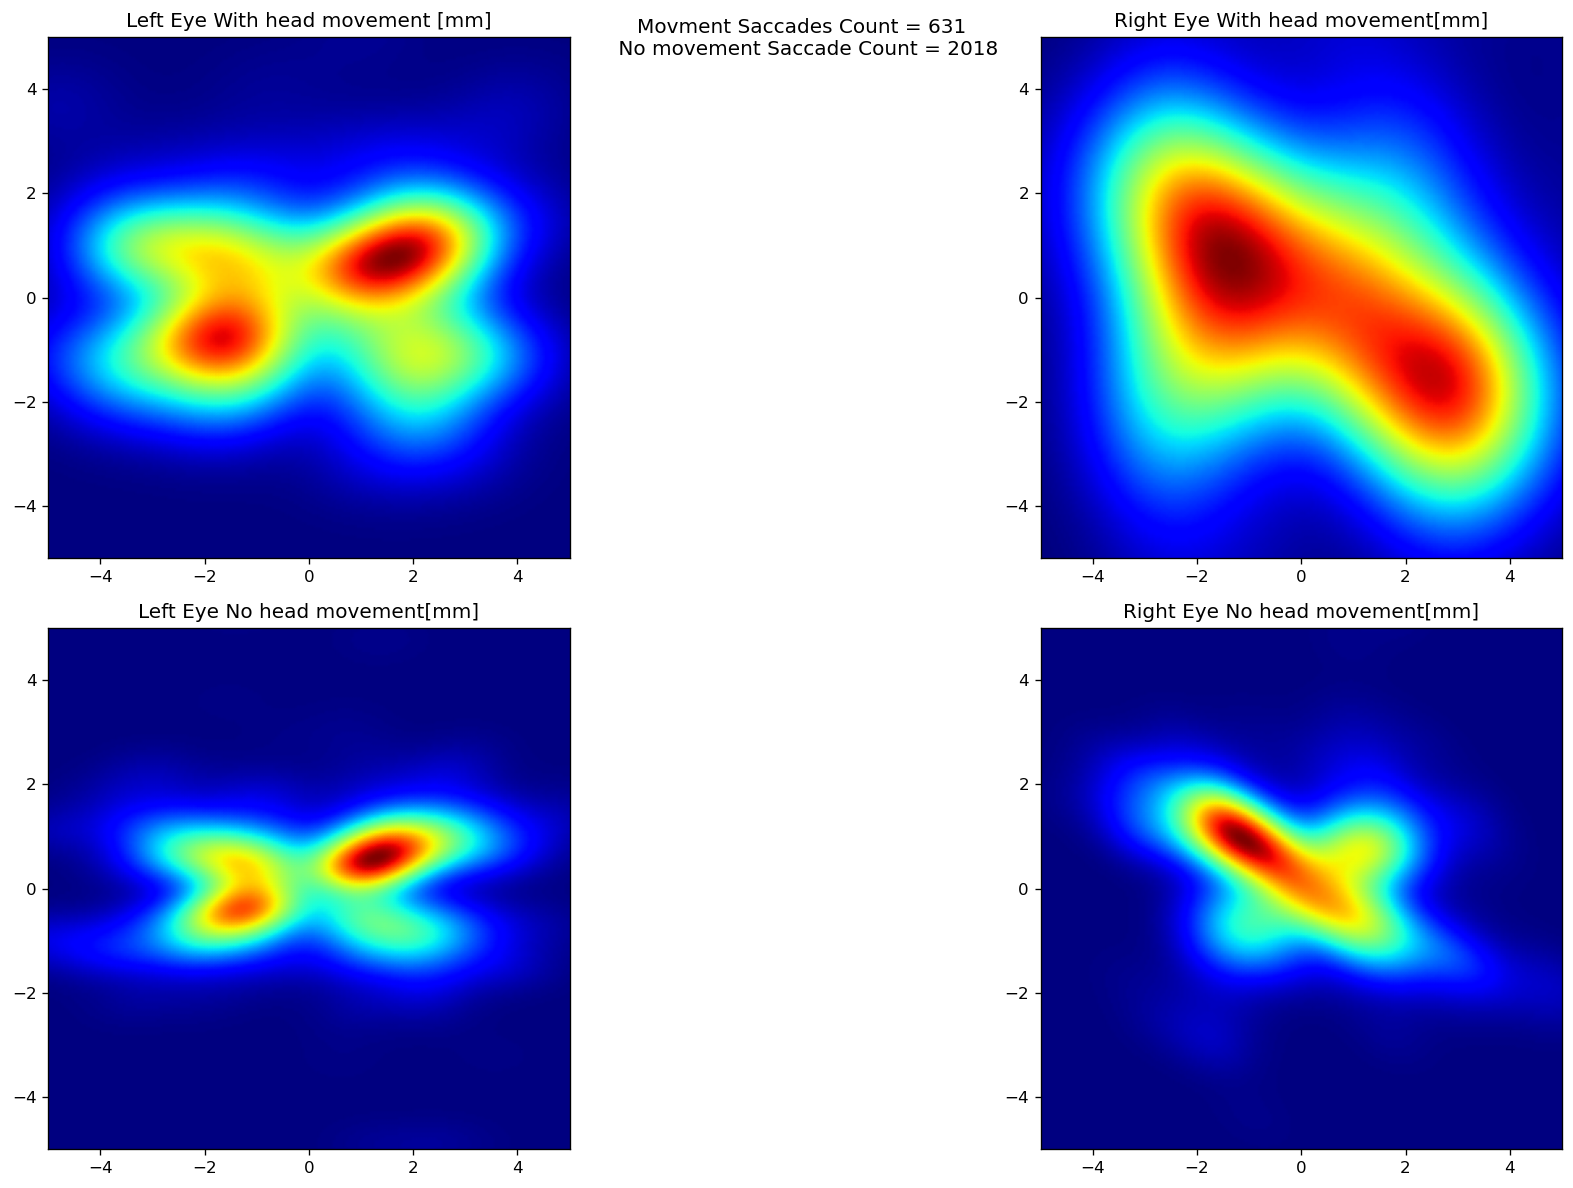

In [17]:
#id_list=['012']
id_list = blockdict.keys()
single_df = non_sync_df.query("block.isin(@id_list)")

# I can now query the data I want to analyze, let's take all the 0 accel magnitude saccades:
no_accel_df = single_df.query("accel == 0")
all_accel_df = single_df.query("accel != 0")

# I can produce the KDE graphs for them:
# parse queries:
la_x = all_accel_df.query('eye == "L"')['calib_dx']
la_y = all_accel_df.query('eye == "L"')['calib_dy']
ra_y = all_accel_df.query('eye == "R"')['calib_dy']
ra_x = all_accel_df.query('eye == "R"')['calib_dx']

ln_x = no_accel_df.query('eye == "L"')['calib_dx']
ln_y = no_accel_df.query('eye == "L"')['calib_dy']
rn_y = no_accel_df.query('eye == "R"')['calib_dy']
rn_x = no_accel_df.query('eye == "R"')['calib_dx']

#understand graph bounderies:
x_stack = np.concatenate([la_x,ra_x,ln_x,rn_x])
y_stack = np.concatenate([la_y,ra_y,ln_y,rn_y])
global_max = np.max(np.concatenate([x_stack,y_stack]))
global_min = np.min(np.concatenate([x_stack,y_stack]))

#xlim = (np.min(x_stack), np.max(x_stack))
#ylim = (np.min(y_stack), np.max(y_stack))
global_max = 5
global_min = -5
# create the graph
fig, axes = plt.subplots(ncols=2, nrows=2, figsize =(10*2,5*2), dpi=120)
uf.plot_kde(axes[0,0],la_x,la_y,200,'Left Eye With head movement [mm]',global_max=global_max,global_min=global_min)
uf.plot_kde(axes[0,1],ra_x,ra_y,200,'Right Eye With head movement[mm]',global_max=global_max,global_min=global_min)
uf.plot_kde(axes[1,0],ln_x,ln_y,200,'Left Eye No head movement[mm]',global_max=global_max,global_min=global_min)
uf.plot_kde(axes[1,1],rn_x,rn_y,200,'Right Eye No head movement[mm]',global_max=global_max,global_min=global_min)
fig.suptitle(f"Mo"
             f"vment Saccades Count = {len(all_accel_df)} \n No movement Saccade Count = {len(no_accel_df)}")
fig.tight_layout()
#plt.savefig(rf'D:\MarkS3\Pictures\Graphs\research_proposal\')

In [16]:
#continue here for mean LFPs near saccades
synced_lfp_stack = stacked_synced_df['samples']
l_non_sync_lfp_stack = stacked_non_synced_df.query('eye=="L"')['samples']
r_non_sync_lfp_stack = stacked_non_synced_df.query('eye=="R"')['samples']

In [17]:
upper_threshold = 400
lower_threshold = -400
lfp_array = np.array(synced_lfp_stack.to_list())
valid_mask = np.all((lower_threshold <= lfp_array) & (lfp_array <= upper_threshold), axis=1)
clean_lfp_stack = synced_lfp_stack[valid_mask]
lfp_array = np.array(l_non_sync_lfp_stack.to_list())
valid_mask = np.all((lower_threshold <= lfp_array) & (lfp_array <= upper_threshold), axis=1)
clean_l_non_sync_stack = l_non_sync_lfp_stack[valid_mask]
lfp_array = np.array(r_non_sync_lfp_stack.to_list())
valid_mask = np.all((lower_threshold <= lfp_array) & (lfp_array <= upper_threshold), axis=1)
clean_r_non_sync_stack = r_non_sync_lfp_stack[valid_mask]
clean_synced_lfp_mean = np.mean(np.array(clean_lfp_stack.tolist()),axis=0)
clean_r_non_sync_mean = np.mean(np.array(clean_r_non_sync_stack.tolist()),axis=0)
clean_l_non_sync_mean = np.mean(np.array(clean_l_non_sync_stack.tolist()),axis=0)



In [15]:
clean_r_non_sync_mean

array([-12.62625, -13.3575 , -15.45375, ...,  -8.23875,   3.0225 ,
         2.73   ])

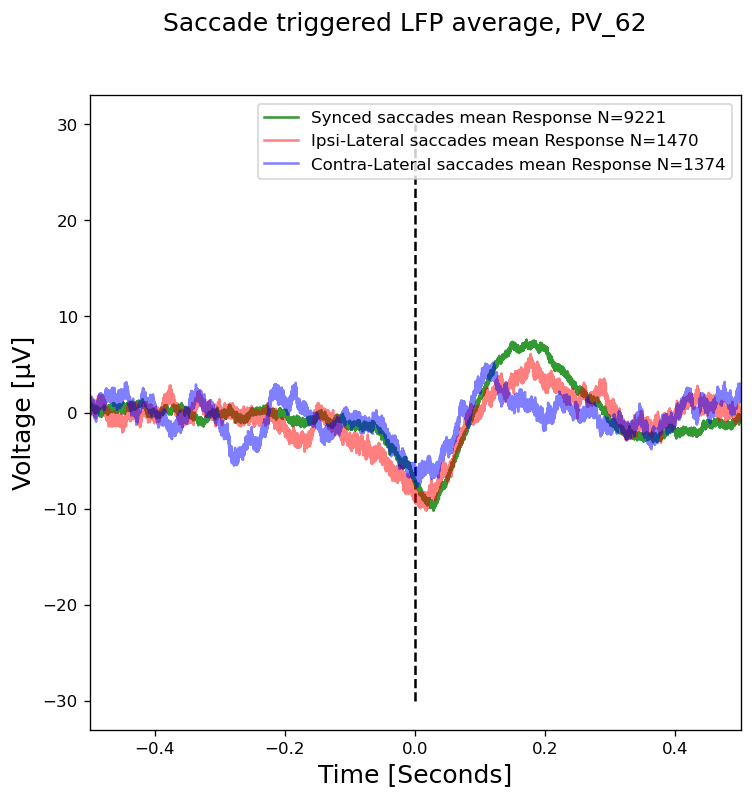

In [18]:
# this is the plotting step:
fig,axes = plt.subplots(dpi=120,figsize=(7,7))
#
# for i in tqdm(range(np.shape(clean_stack)[0])):
#     # plot the clean responses
#     axes.plot(x_axis,clean_stack[i],alpha=0.0025, color='green')
#     # plot the zero line
x_axis = np.arange(-20000,20000) / 20000
axes.vlines(0,-30,30,linestyles='--')
#axes.plot(x_axis,mean_samples_vector_all,color='blue',label=f'all Mean Response N={np.shape(all_saccade_stack)[0]}')
#axes.plot(x_axis,mean_samples_vector_dirty,color='red',label=f'dirty Mean Response N={np.shape(noise_stack)[0]}')
axes.plot(x_axis,clean_synced_lfp_mean,color='green',label=f'Synced saccades mean Response N={np.shape(clean_lfp_stack)[0]}',alpha=0.8)
axes.plot(x_axis,clean_r_non_sync_mean,color='red',label=f'Ipsi-Lateral saccades mean Response N={np.shape(clean_r_non_sync_stack)[0]}',alpha=0.5)
axes.plot(x_axis,clean_l_non_sync_mean,color='blue',label=f'Contra-Lateral saccades mean Response N={np.shape(clean_l_non_sync_stack)[0]}',alpha=0.5)
# axes.plot(speed_x_axis,(lx_mean_speed_vec*20)-80,color='red',label='mean left eye x speed')
# axes.plot(speed_x_axis,(ly_mean_speed_vec*20)-80,color='orange',label='mean left eye y speed')
# axes.plot(x_axis,mean_samples_vector_all,color='green')
axes.set_xlabel('Time [Seconds]')
axes.set_ylabel('Voltage [\u03bcV]')
axes.xaxis.label.set_size(15)
axes.yaxis.label.set_size(15)
axes.set_xlim(-0.5,+0.5)
plt.suptitle(f'Saccade triggered LFP average, PV_62',fontsize=15)
plt.legend()
#plt.savefig(fname=r'D:\MarkS3\Pictures\Graphs\PV_62\saccade_triggered_LFP_avg_b72_b74_onlySynced_Darkness.pdf',format='pdf')

In [34]:
single_block_saccade_ts = all_sync_df[['block','timestamps']][all_sync_df['block']=='070']

In [36]:
ts_list = list(single_block_saccade_ts['timestamps'].values - 1000)

In [37]:
data, timestamps = block.oe_rec.get_data(channels=[1,5,10,15,21,25,30],start_time_ms=ts_list,window_ms=2000)

sample removed for window #2
sample removed for window #12
sample removed for window #24
sample removed for window #28
sample removed for window #36
sample removed for window #40
sample removed for window #42
sample removed for window #70
sample removed for window #85
sample removed for window #112
sample removed for window #135
sample removed for window #139
sample removed for window #142
sample removed for window #150
sample removed for window #155
sample removed for window #159
sample removed for window #175
sample removed for window #190
sample removed for window #195
sample removed for window #217
sample removed for window #235
sample removed for window #243
sample removed for window #259
sample removed for window #292
sample removed for window #294
sample removed for window #300
sample removed for window #302
sample removed for window #306
sample removed for window #311
sample removed for window #314
sample removed for window #332
sample removed for window #336
sample removed for

In [ ]:
fig,axes = plt.subplots(dpi=120,figsize=(5,7))


In [40]:
data.shape

(7, 770, 40000)

In [44]:
mean_vectors = []
for channel in range(data.shape[0]):
    # calculate mean:
    channel_mean = np.mean(data[channel,:,:], axis=0)
    mean_vectors.append(channel_mean)


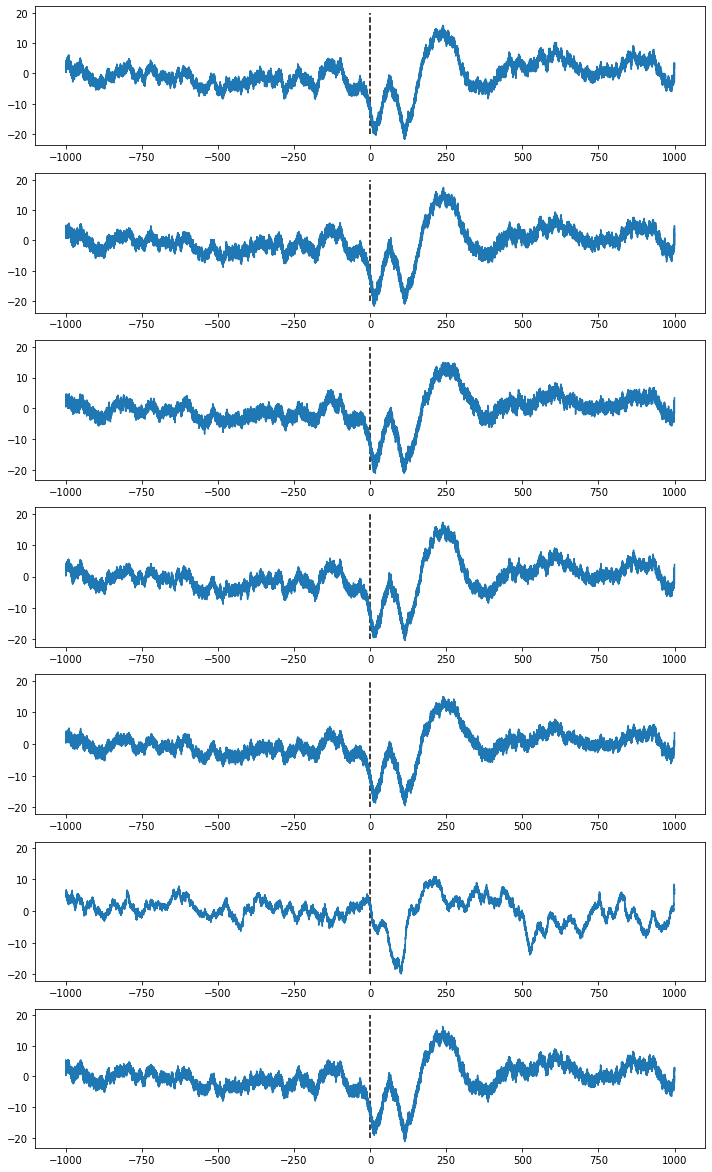

In [54]:
vector_list = mean_vectors
x_axis = (np.arange(len(vector_list[0])) / 20) - 1000
fig, axs = plt.subplots(nrows=len(vector_list), figsize=(12,3*len(vector_list)))
fig.suptitle(f'individual channels mean saccade response, block {block.block_num}')
for i, vec in enumerate(vector_list):
    axs[i].plot(x_axis,vec)
    axs[i].vlines(0,ymin=-20,ymax=20,linestyles='--')


In [19]:
l_df = pd.DataFrame.from_dict(block.saccade_dict['L'])
l_df['eye'] = 'L'
l_df['block'] = block.block_num
l_df['datetime'] = block.exp_date_time
r_df = pd.DataFrame.from_dict(block.saccade_dict['R'])
r_df['eye'] = 'R'
r_df['block'] = block.block_num
r_df['datetime'] = block.exp_date_time

df = pd.concat([l_df, r_df])
df

,timestamps,fs,pxx,samples,x_coords,y_coords,vid_inds,accel,eye,block,datetime
0,25657.30,"[0.0, 1.220703125, 2.44140625, 3.662109375, 4....","[155.18581573582532, 1079.1112109523235, 865.7...","[-152.29500000000002, -162.04500000000002, -17...","[292.73318973129744, 292.8373269294999, 292.89...","[117.6188300758618, 117.49096578018762, 117.42...","[0, 340, 679, 1019, 1358, 1698, 2038, 2377, 27...",0.000000e+00,L,070,2023-05-18_14-26-15
1,34672.25,"[0.0, 1.220703125, 2.44140625, 3.662109375, 4....","[6.644543501944187, 67.77547741795006, 115.938...","[36.660000000000004, 37.245000000000005, 10.14...","[283.1223804397333, 283.28468892659754, 283.19...","[114.17183900244906, 114.10179770988688, 114.0...","[0, 340, 679, 1019, 1358, 1698, 2038, 2377, 27...",0.000000e+00,L,070,2023-05-18_14-26-15
2,41496.60,"[0.0, 1.220703125, 2.44140625, 3.662109375, 4....","[6.482523913243895, 82.96850540990111, 82.9359...","[-70.2, -5.07, 38.025, 32.76, -17.55, -70.785,...","[271.38442097921126, 271.673005412187, 271.938...","[142.4495850676984, 142.67438371717498, 142.74...","[0, 339, 679, 1018, 1358, 1697, 2037, 2377, 27...",2.019125e+07,L,070,2023-05-18_14-26-15
3,41802.25,"[0.0, 1.220703125, 2.44140625, 3.662109375, 4....","[17.11837490943032, 127.5468686247926, 98.7199...","[68.25, 82.485, 112.71000000000001, 86.19, 10....","[271.3899604741278, 271.6485384431632, 271.571...","[142.72573750410925, 142.78420880466308, 142.7...","[0, 340, 679, 1019, 1358, 1698, 2037, 2377, 27...",3.691839e+07,L,070,2023-05-18_14-26-15
4,42803.85,"[0.0, 1.220703125, 2.44140625, 3.662109375, 4....","[92.0982024081837, 304.9724523117474, 245.1994...","[-26.91, -33.15, 8.19, 38.415, 64.740000000000...","[315.85025190650373, 311.20916760272235, 309.5...","[97.32065458825113, 93.61980316094312, 93.9800...","[0, 340, 679, 1019, 1359, 1698, 2037, 2377, 27...",7.448846e+07,L,070,2023-05-18_14-26-15
...,...,...,...,...,...,...,...,...,...,...,...
474,3510111.20,"[0.0, 1.220703125, 2.44140625, 3.662109375, 4....","[6.955557328645306, 105.65935087946939, 168.23...","[19.5, 11.31, -4.875, -3.12, 5.07, 2.145, 23.7...","[298.5050463116184, 298.44012434686033, 298.40...","[218.01581007091045, 218.2074015602896, 218.05...","[0, 339, 679, 1018, 1357, 1697, 2036, 2375, 27...",2.904264e+05,R,070,2023-05-18_14-26-15
475,3622565.55,"[0.0, 1.220703125, 2.44140625, 3.662109375, 4....","[77.28943696586457, 717.1638762241619, 1285.33...","[-37.83, -10.335, 2.9250000000000003, -21.0600...","[292.3749899281251, 292.20571170920465, 292.52...","[227.38178453532208, 227.30059300036152, 227.3...","[0, 339, 679, 1018, 1358, 1697, 2036, 2376, 27...",6.438772e+06,R,070,2023-05-18_14-26-15
476,3622939.00,"[0.0, 1.220703125, 2.44140625, 3.662109375, 4....","[126.24407515663593, 705.27819287208, 1215.609...","[95.355, 73.515, 65.325, 69.42, 86.775, 87.945...","[292.2742689327953, 292.3563661038425, 292.268...","[226.9460180449741, 227.0284814804789, 226.892...","[0, 340, 679, 1018, 1358, 1697, 2036, 2376, 27...",7.039614e+06,R,070,2023-05-18_14-26-15
477,3623159.60,"[0.0, 1.220703125, 2.44140625, 3.662109375, 4....","[163.38377497329293, 560.2235144538012, 1013.1...","[69.03, 51.870000000000005, 70.98, 70.785, 70....","[292.46017063232244, 292.41994878520444, 292.6...","[227.18120222254154, 226.99136434827358, 227.5...","[0, 340, 679, 1018, 1358, 1698, 2037, 2376, 27...",7.436008e+06,R,070,2023-05-18_14-26-15


In [29]:
df_r = pd.DataFrame.from_dict(block.synced_saccades_dict['R'][['timestamps','fs']])
#df_l = pd.DataFrame.from_dict(block.synced_saccades_dict['L'])

TypeError: unhashable type: 'list'

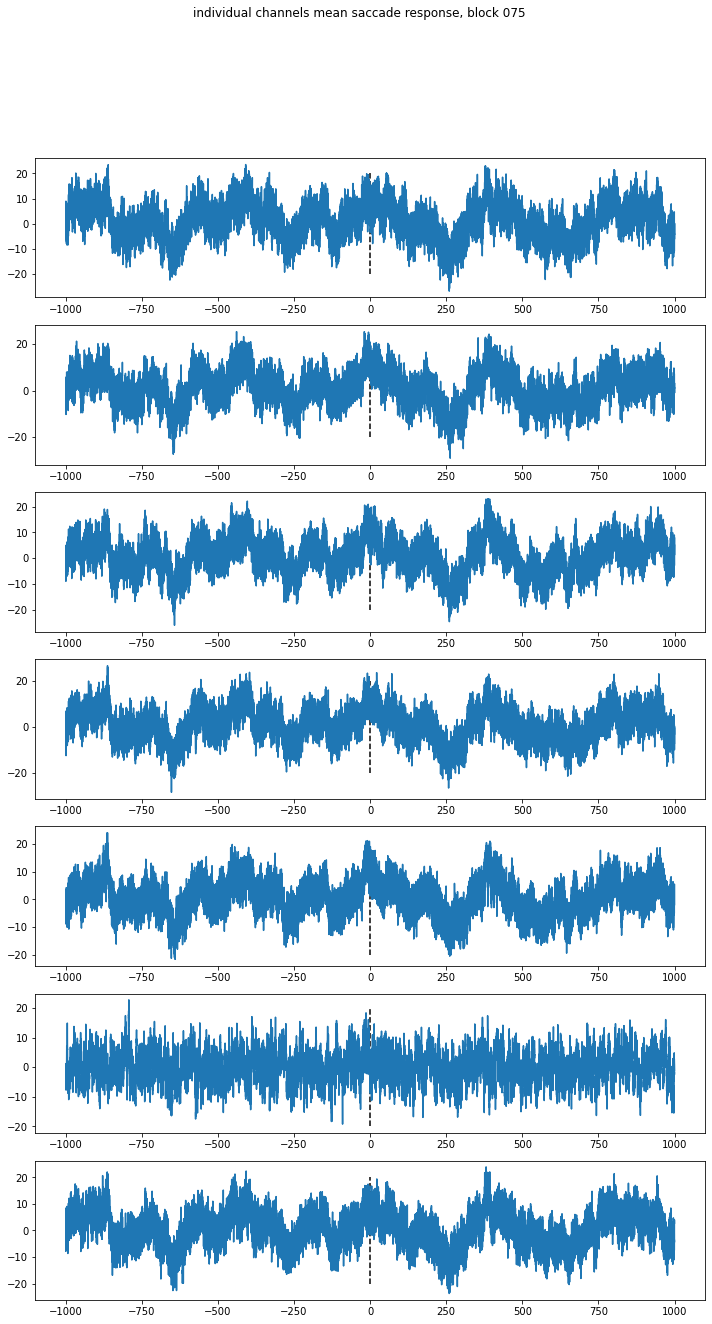

In [36]:
transient_ts_075 = np.array([
    56200,
    63500,
    71000,
    103069,
    113270,
    144303,
    179000,
    215300,
    258000,
    285000,
    298000,
    307578,
    418500,
    448700,
    473100,
    508378]) - 1000
data, timestamps = block.oe_rec.get_data(channels=[1,5,10,15,21,25,30],
                                         start_time_ms=transient_ts_075,
                                         window_ms=2000)
mean_vectors = []
for channel in range(data.shape[0]):
    # calculate mean:
    channel_mean = np.mean(data[channel,:,:], axis=0)
    mean_vectors.append(channel_mean)

vector_list = mean_vectors
x_axis = (np.arange(len(vector_list[0])) / 20) - 1000
fig, axs = plt.subplots(nrows=len(vector_list), figsize=(12,3*len(vector_list)))
fig.suptitle(f'individual channels mean saccade response, block {block.block_num}')
for i, vec in enumerate(vector_list):
    axs[i].plot(x_axis,vec)
    axs[i].vlines(0,ymin=-20,ymax=20,linestyles='--')




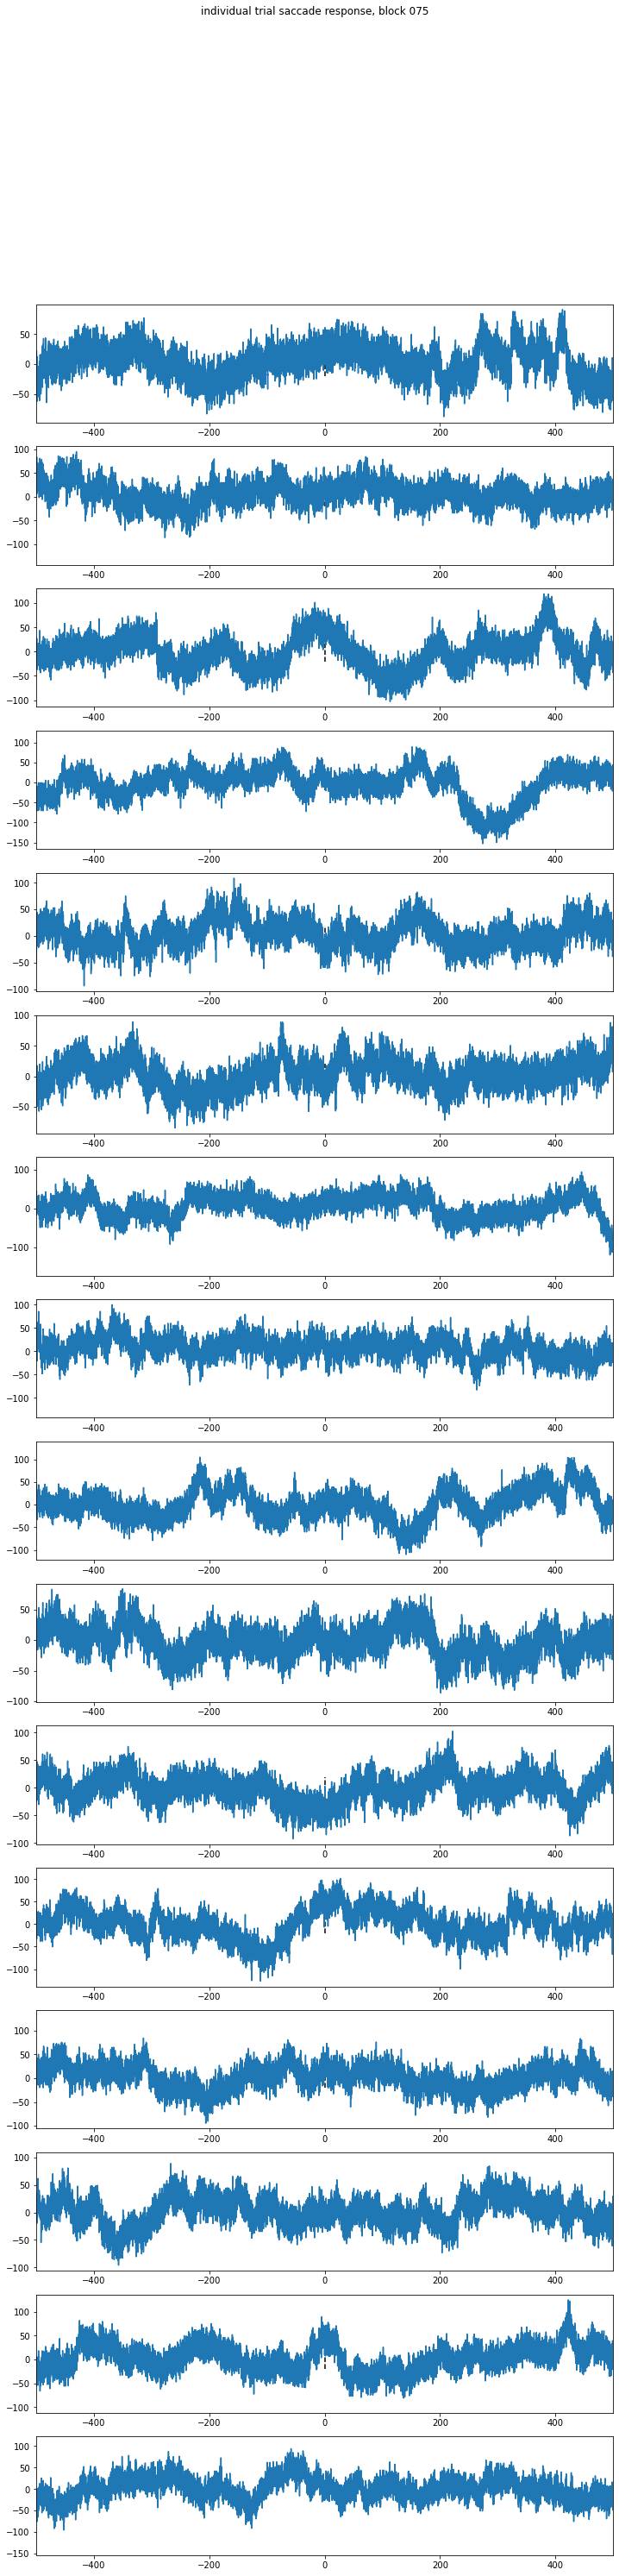

In [40]:
trial_vectors = []
for trial in range(data.shape[1]):
    trial_vec = data[3,trial,:]
    trial_vectors.append(trial_vec)
fig, axs = plt.subplots(nrows=len(trial_vectors), figsize=(12,3*len(trial_vectors)))
fig.suptitle(f'individual trial saccade response, block {block.block_num}')

for i, vec in enumerate(trial_vectors):
    axs[i].plot(x_axis,vec)
    axs[i].vlines(0,ymin=-20,ymax=20,linestyles='--')
    axs[i].set_xlim(-500,500)

In [74]:
# post saccade pupil response
ts = block.synced_saccades_df.timestamps.values + 1000
le_diameters = block.le_df
re_diameters = block.re_df
le_samples = []
re_samples = []
for saccade in tqdm.tqdm(ts):
    le_data = le_diameters.query('ms_axis > @saccade-5000 and ms_axis < @saccade+5000')
    le_samples.append(le_data['ellipse_size'].values)
    re_data = re_diameters.query('ms_axis > @saccade-5000 and ms_axis < @saccade+5000')
    re_samples.append(re_data['ellipse_size'].values)



100%|██████████| 2268/2268 [00:19<00:00, 114.46it/s]


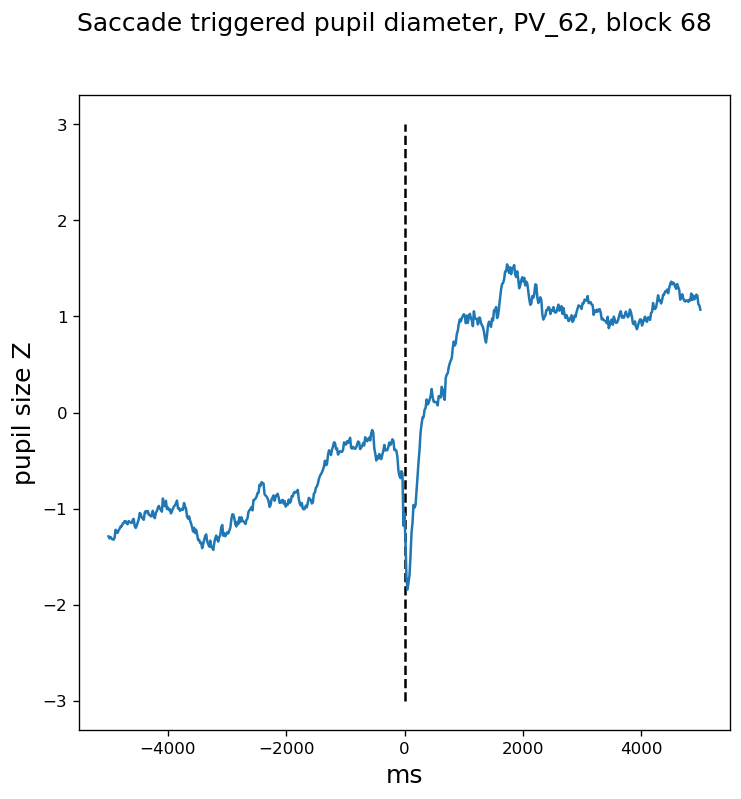

In [89]:
array_list = le_samples
max_cols = max(len(arr) for arr in array_list)
padded_arrays = [np.pad(arr, (0, max_cols - len(arr)), constant_values=np.nan) for arr in array_list]
big_array = np.vstack(padded_arrays)
mean_vec = np.nanmean(big_array,axis=0)
norm_vec = (mean_vec - np.mean(mean_vec)) / np.std(mean_vec)
fig, axs = plt.subplots(dpi=120,figsize=(7,7))
plt.suptitle(f'Saccade triggered pupil diameter, PV_62, block 68',fontsize=15)
axs.xaxis.label.set_size(15)
axs.yaxis.label.set_size(15)
axs.set_xlabel('ms')
axs.set_ylabel('pupil size Z')
x_axis = (np.arange(0,len(mean_vec))*17) - 5000
axs.vlines(0,-3,3,linestyles='--')
axs.plot(x_axis,norm_vec)
plt.savefig(fname=r'D:\MarkS3\Pictures\Graphs\PV_62\Saccade_triggered_pupil_diameter_PV_62_block_68_leftt_eye.pdf',format='pdf')

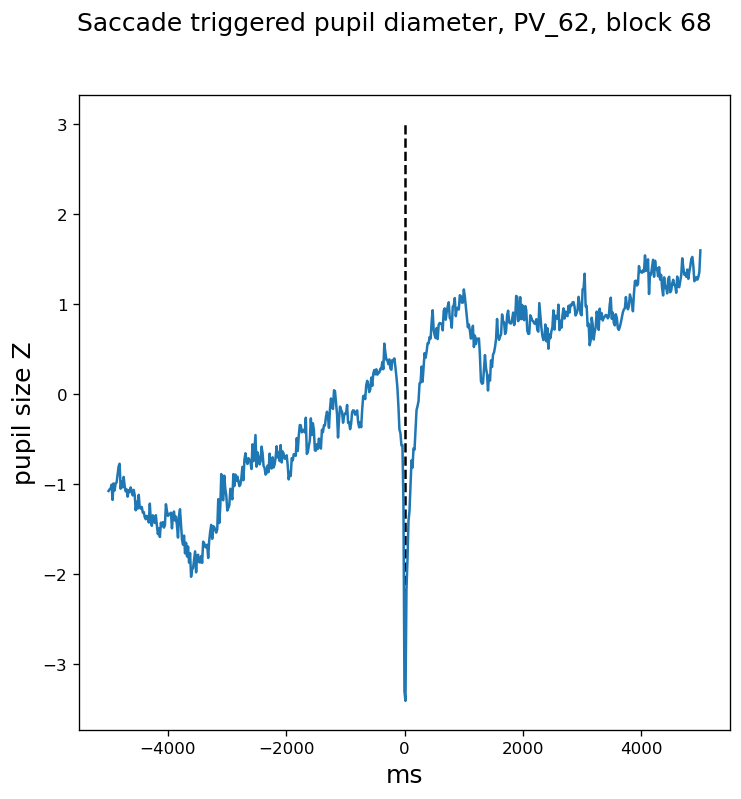

In [90]:
array_list = re_samples
max_cols = max(len(arr) for arr in array_list)
padded_arrays = [np.pad(arr, (0, max_cols - len(arr)), constant_values=np.nan) for arr in array_list]
big_array = np.vstack(padded_arrays)
mean_vec = np.nanmean(big_array,axis=0)
norm_vec = (mean_vec - np.mean(mean_vec)) / np.std(mean_vec)
fig, axs = plt.subplots(dpi=120,figsize=(7,7))
plt.suptitle(f'Saccade triggered pupil diameter, PV_62, block 68',fontsize=15)
axs.xaxis.label.set_size(15)
axs.yaxis.label.set_size(15)
axs.set_xlabel('ms')
axs.set_ylabel('pupil size Z')
x_axis = (np.arange(0,len(mean_vec))*17) - 5000
axs.vlines(0,-3,3,linestyles='--')
axs.plot(x_axis,norm_vec)
plt.savefig(fname=r'D:\MarkS3\Pictures\Graphs\PV_62\Saccade_triggered_pupil_diameter_PV_62_block_68_right_eye.pdf',format='pdf')

In [1]:
block

NameError: name 'block' is not defined